In [109]:
%matplotlib notebook

from datetime import datetime
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [47]:
# fight start and all phase transitions line up perfectly with RP lines, unsure if this happens with other fights
# first entry is None to line up index with phases
# accessed with (row[0] == '00' and row[4] in phaseTransition)
phaseTransition = {
    'None':0,
    'You are the Alpha, I am the Omega. <blip> Initiating direct analysis of subject group.':1,
    'I am the Omega and the Alpha. I will mimic your weakness to comprehend your strength.':2,
    'Evaluation. Imitation of mortal form and behavior provides negligible improvement to combat capabilities.':3,
    '<blip> <bleep> Critical damage detected. Initiating system shutdown...':4,
    'Must evolve...beyond current parameters... I must...see...':5,
    'I am the Omega, and I walk with the Alpha. Where one ends, another begins.':6
}

In [48]:
list(phaseTransition)[1]

'You are the Alpha, I am the Omega. <blip> Initiating direct analysis of subject group.'

In [105]:
pullStarted = False
pullCount = 0

# pull set [[pull number], [pull length], [phase], [phase color]]
pullSet = [[], [], [], []]

with open('test_log.log', encoding='utf-8') as log:
    for i, line in enumerate(log):
        row = line.split('|')
        
        # this if statement only is entered after a wipe
        if(not pullStarted):
            # just row[4] isn't enough, some rows don't have 5 elements
            # starts pull
            if(row[0] == '00' and row[4] == list(phaseTransition)[1]):
                pullStarted = True
                pullStartTime = datetime.strptime(row[1][:-14], '%Y-%m-%dT%H:%M:%S')
                
                pullCount += 1
        
        if(pullStarted):
            if(row[0] == '00' and row[4] in phaseTransition):
                pullPhase = phaseTransition[row[4]]
            
            # 4000000F is a wipe event, ends pull
            if(pullStarted and row[0] == '33' and row[3] == '4000000F'):
                pullStarted = False
                
                pullEndTime = datetime.strptime(row[1][:-14], '%Y-%m-%dT%H:%M:%S')
                pullLength = pullEndTime - pullStartTime
                
                # save pull info to pullSet
                pullSet[0].append(pullCount)
                pullSet[1].append(pullLength.total_seconds())
                pullSet[2].append(pullPhase)
    print(f'pulls: {pullCount}')

pulls: 15


<IPython.core.display.Javascript object>


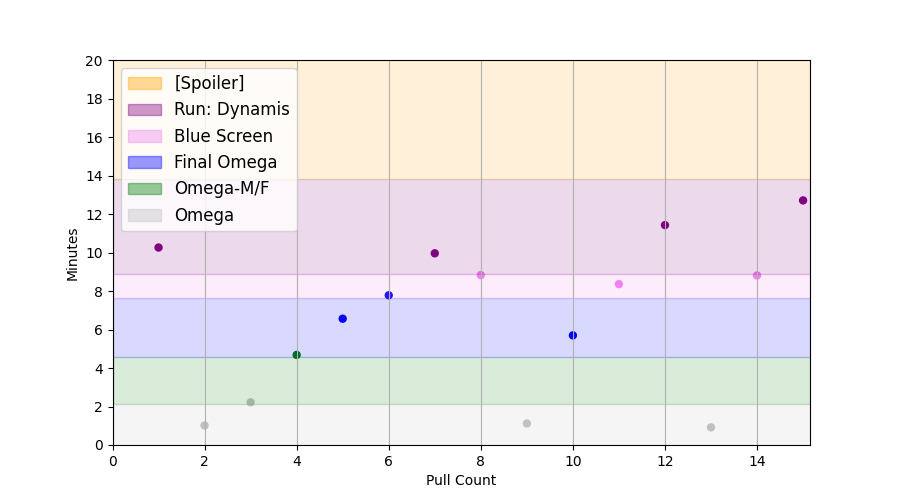

silver
green
blue
violet
purple
orange


In [120]:
phaseColors = [None, 'silver', 'green', 'blue', 'violet', 'purple', 'orange']
phaseNames = [None, 'Omega', 'Omega-M/F', 'Final Omega', 'Blue Screen', 'Run: Dynamis', '[Spoiler]']
phaseTimings = [0, 127, 274, 460, 534, 830, 1201]

# assign a color for each entry in pullSet
# reset pullSet[3] for ease of debug
pullSet[3] = []
for pullPhase in pullSet[2]:
    pullSet[3].append(phaseColors[pullPhase])
    
    

plt.figure(figsize=(9, 5))
plt.scatter(pullSet[0], pullSet[1], color=pullSet[3], s=25)

plt.xlim(0, len(pullSet[0])*1.01)
plt.ylim(0, 1201)

plt.yticks(np.arange(0, 1201, 120), np.arange(0, 22, 2))

plt.xlabel('Pull Count')
plt.ylabel('Minutes')

# set colors for bands on graph
for i in range(0, 6):
    plt.axhspan(phaseTimings[i], phaseTimings[i+1], color=phaseColors[i+1], alpha=0.15)
    
legendPatches = []
for i in range(1, 7):
    legendPatches.append(mpatches.Patch(color=phaseColors[i], label=phaseNames[i], alpha=0.4))
    print(phaseColors[i])
legendPatches.reverse()

plt.grid(axis='x')
plt.legend(handles=legendPatches, loc=2, fontsize='large')

In [103]:
for i in range(1, 7):
    print(i)

1
2
3
4
5
6


In [119]:
pullSet[3]

['purple',
 'silver',
 'silver',
 'green',
 'blue',
 'blue',
 'purple',
 'violet',
 'silver',
 'blue',
 'violet',
 'purple',
 'silver',
 'violet',
 'purple']